<a href="https://colab.research.google.com/github/ommore86/Machine-Learning/blob/main/ML_7_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving house_price.csv to house_price.csv


In [ ]:
import pandas as pd
import numpy as np

# Load dataset (change file name as needed)
df = pd.read_csv("house_price.csv")

# Drop non-numeric/categorical columns
df = df.drop(columns=['date', 'street', 'city', 'statezip', 'country'])

# Drop rows with missing values (if any)
df = df.dropna()

# Preview the cleaned dataset
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [ ]:
# Features and target
X = df.drop("price", axis=1).values
y = df["price"].values

# Normalize features (important for gradient descent)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias term (column of 1s for intercept)
X = np.c_[np.ones(X.shape[0]), X]  # shape: (n_samples, n_features + 1)

# Reshape y to be column vector
y = y.reshape(-1, 1)


In [ ]:
# Initialize weights
n_samples, n_features = X.shape
weights = np.zeros((n_features, 1))

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# To track loss over time
loss_history = []

# Gradient Descent Loop
for epoch in range(epochs):
    # Predictions
    y_pred = X @ weights

    # Error
    error = y_pred - y

    # Compute gradients
    gradients = (2 / n_samples) * (X.T @ error)

    # Update weights
    weights -= learning_rate * gradients

    # Compute MSE loss
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    # Print every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: MSE Loss = {loss:.2f}")


Epoch 0: MSE Loss = 622503601664.23
Epoch 100: MSE Loss = 255730063411.51
Epoch 200: MSE Loss = 248994413110.15
Epoch 300: MSE Loss = 248667074549.81
Epoch 400: MSE Loss = 248624244954.59
Epoch 500: MSE Loss = 248616671977.55
Epoch 600: MSE Loss = 248615248783.69
Epoch 700: MSE Loss = 248614972035.85
Epoch 800: MSE Loss = 248614915906.25
Epoch 900: MSE Loss = 248614903795.00


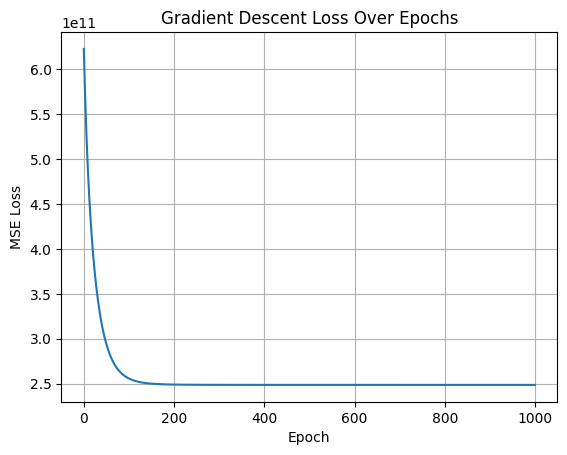

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Loss Over Epochs")
plt.grid(True)
plt.show()


In [ ]:
# Final prediction on the same data (not for real-world use)
y_pred = X @ weights

# Show first 5 predictions vs actual
for i in range(5):
    print(f"Predicted: ${y_pred[i][0]:,.2f} | Actual: ${y[i][0]:,.2f}")


Predicted: $359,493.77 | Actual: $313,000.00
Predicted: $1,229,539.27 | Actual: $2,384,000.00
Predicted: $512,167.61 | Actual: $342,000.00
Predicted: $524,935.96 | Actual: $420,000.00
Predicted: $451,961.76 | Actual: $550,000.00


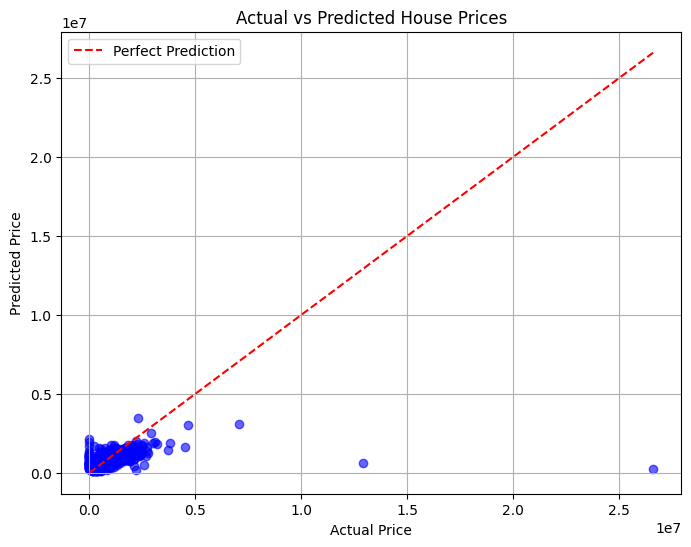

In [ ]:
import matplotlib.pyplot as plt

# Predicted values
y_pred = X @ weights

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue')

# Perfect prediction line (y = x)
max_price = max(y.max(), y_pred.max())
plt.plot([0, max_price], [0, max_price], 'r--', label="Perfect Prediction")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()
